In [200]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

from statsmodels.tsa.seasonal import seasonal_decompose

In [201]:
imb_df = pd.read_csv('../data/imbalance_de.csv', squeeze=True, parse_dates=True, header=None)
imb_df.head()

,0,1,2
0,2013-12-31 23:00:00,707.500,156.36
1,2013-12-31 23:15:00,966.296,81.23
2,2013-12-31 23:30:00,1018.984,104.01
3,2013-12-31 23:45:00,867.940,60.51
4,2014-01-01 00:00:00,1738.004,239.03


In [202]:
imb_df.shape

(257010, 3)

In [203]:
imb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257010 entries, 0 to 257009
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       257010 non-null  object 
 1   1       256807 non-null  float64
 2   2       257010 non-null  float64
dtypes: float64(2), object(1)
memory usage: 5.9+ MB


In [204]:
imb_df.describe()

,1,2
count,256807.000000,257010.000000
mean,80.856740,34.069293
std,494.219467,127.651278
min,-4111.964000,-6503.730000
25%,-205.410000,5.280000
50%,76.797000,38.080000
75%,365.612500,60.940000
max,3866.284000,24455.050000


In [205]:
imb_df['datetime'] = pd.to_datetime(imb_df[0])
imb_df.drop([0], axis=1, inplace=True)
imb_df.head()

,1,2,datetime
0,707.500,156.36,2013-12-31 23:00:00
1,966.296,81.23,2013-12-31 23:15:00
2,1018.984,104.01,2013-12-31 23:30:00
3,867.940,60.51,2013-12-31 23:45:00
4,1738.004,239.03,2014-01-01 00:00:00


In [206]:
imb_df['datetime'].dt.weekday.unique()

array([1, 2, 3, 4, 5, 6, 0])

In [207]:
imb_df['date'] = imb_df['datetime'].dt.date

In [208]:
imb_df['weekday'] = imb_df['datetime'].dt.weekday

In [209]:
#time_range = pd.date_range(date_str, date_str + ' 23:59:00', freq='1H')

#imb_refill = (imb_df.set_index(keys=['datetime'])
            #.resample('1H').ffill()
            #.reindex(time_range).bfill())

In [210]:
imb_df.head()

,1,2,datetime,date,weekday
0,707.500,156.36,2013-12-31 23:00:00,2013-12-31,1
1,966.296,81.23,2013-12-31 23:15:00,2013-12-31,1
2,1018.984,104.01,2013-12-31 23:30:00,2013-12-31,1
3,867.940,60.51,2013-12-31 23:45:00,2013-12-31,1
4,1738.004,239.03,2014-01-01 00:00:00,2014-01-01,2


In [222]:
imb_df = imb_df.set_index('datetime')

In [226]:
# resample dataframe per 1 hour
imb_resample = imb_df.resample('1H').mean()

In [227]:
imb_resample.isnull().sum()

1          555
2          507
weekday    507
dtype: int64

In [228]:
# interpolate missing values
imb_resample = imb_df.interpolate(method='time', limit_direction='both')

In [229]:
imb_resample.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 257010 entries, 2013-12-31 23:00:00 to 2021-05-22 22:00:00
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   1        257010 non-null  float64
 1   2        257010 non-null  float64
 2   date     257010 non-null  object 
 3   weekday  257010 non-null  int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 9.8+ MB


<AxesSubplot:xlabel='datetime', ylabel='1'>

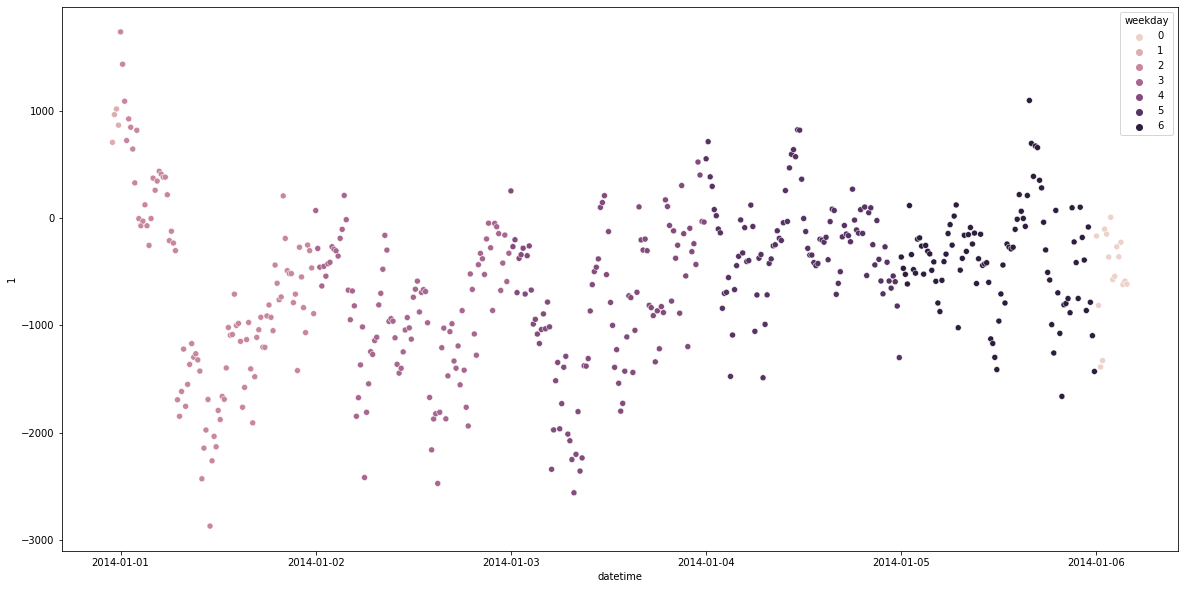

In [211]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=imb_df.iloc[0:500], x='datetime', y=1, hue='weekday')

In [212]:
(imb_df['datetime'] == pd.to_datetime('2021-05-22')).sum()

0

In [213]:
imb_df.isnull().sum()

1           203
2             0
datetime      0
date          0
weekday       0
dtype: int64

In [214]:
null_data = imb_df[imb_df.isnull().any(axis=1)]

In [217]:
null_data.head(10)

,1,2,datetime,date,weekday
35161,NaN,-249.21,2015-01-02 05:15:00,2015-01-02,4
35162,NaN,-287.65,2015-01-02 05:30:00,2015-01-02,4
35163,NaN,-336.42,2015-01-02 05:45:00,2015-01-02,4
35170,NaN,-116.46,2015-01-02 07:30:00,2015-01-02,4
36810,NaN,122.60,2015-01-19 09:30:00,2015-01-19,0
36811,NaN,154.10,2015-01-19 09:45:00,2015-01-19,0
64224,NaN,0.30,2015-10-31 23:00:00,2015-10-31,5
64225,NaN,134.63,2015-10-31 23:15:00,2015-10-31,5
64226,NaN,27.25,2015-10-31 23:30:00,2015-10-31,5
64227,NaN,-1.57,2015-10-31 23:45:00,2015-10-31,5


In [169]:
d1 = imb_df[imb_df.date == datetime.date(year=2021,month=5,day=22)]

In [170]:
d1 = d1.set_index('datetime')

In [171]:
# resample dataframe per 1 hour
d1 = d1.resample('1H').mean()

In [172]:
d1

,1,2,weekday
datetime,,,
2021-05-22 20:00:00,30.308,111.81,5.0
2021-05-22 21:00:00,NaN,NaN,NaN
2021-05-22 22:00:00,298.170,32.98,5.0


In [173]:
d1 = d1.asfreq(freq='1H')

<AxesSubplot:xlabel='datetime', ylabel='1'>

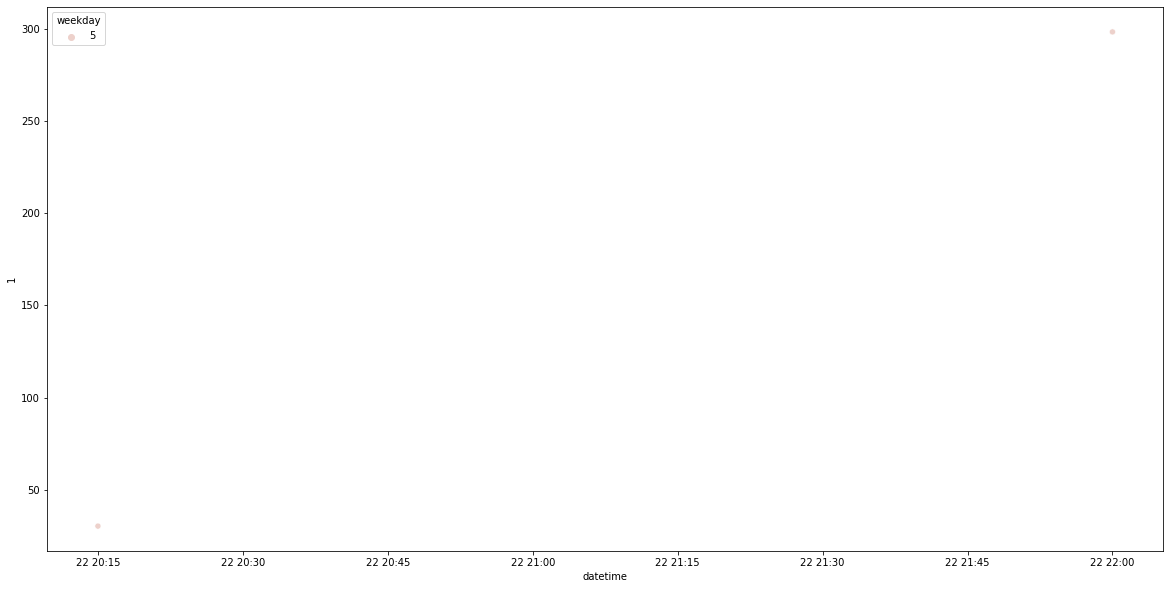

In [134]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=d1, x='datetime', y=1, hue='weekday')

In [135]:
# reset index
imb_df = imb_df.set_index('datetime')

In [136]:
# interpolate missing values
imb_df = imb_df.interpolate(method='time', limit_direction='both')
#imb_df = imb_df.interpolate(method='time', limit_direction='both')

In [137]:
imb_df.isna().sum()

1          0
2          0
weekday    0
date       0
dtype: int64

In [138]:
d2 = imb_df[imb_df.date == datetime.date(year=2021,month=5,day=22)]

In [140]:
d2

,1,2,weekday,date
datetime,,,,
2021-05-22 20:15:00,30.308,111.81,5,2021-05-22
2021-05-22 22:00:00,298.170,32.98,5,2021-05-22


<AxesSubplot:xlabel='datetime', ylabel='1'>

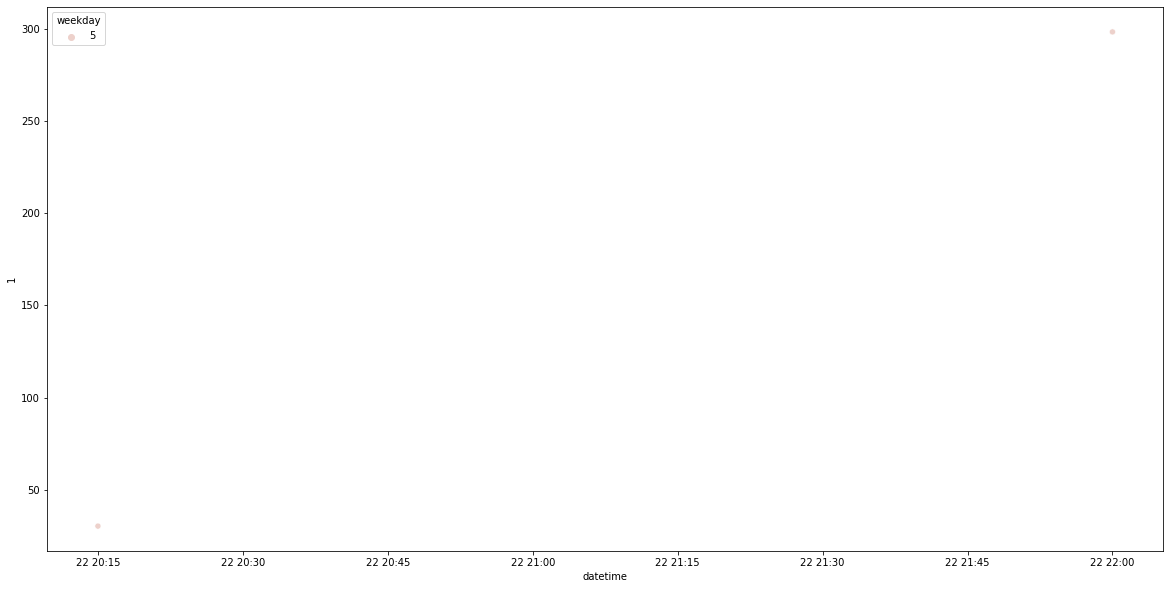

In [139]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=d2, x='datetime', y=1, hue='weekday')

In [34]:
imb_df.isnull().sum()

1    0
2    0
dtype: int64

In [37]:
imb_df[1] = imb_df[1].apply(lambda x: float(x))

In [40]:
# resample dataframe per 1 hour
imb_df.resample('1H').mean()

,1,2
datetime,,
2013-12-31 23:00:00,890.180,100.5275
2014-01-01 00:00:00,1247.803,115.8125
2014-01-01 01:00:00,687.314,43.8750
2014-01-01 02:00:00,179.749,-98.4525
2014-01-01 03:00:00,-50.736,-112.1200
...,...,...
2021-05-22 18:00:00,NaN,NaN
2021-05-22 19:00:00,NaN,NaN
2021-05-22 20:00:00,30.308,111.8100


In [ ]:
imb_df = imb_df.reset_index()

In [ ]:
imb_df['day'] = imb_df['datetime'].dt.to_period('D')
imb_df['hours'] = imb_df['datetime'].dt.hour

In [ ]:
imb_df.head(20)

In [ ]:
imb_df = imb_df.groupby(['day','hours']).median()

In [ ]:
imb_df = imb_df.reset_index()

In [ ]:
imb_df.head()

In [ ]:
imb_df.info()

In [ ]:
imb_df['day'] = pd.to_datetime(imb_df['day'])
imb_df['hours'] = imb_df['hours'].astype('str')

In [ ]:
imb_df.apply(lambda r : pd.datetime.combine(imb_df['day'],imb_df['hours']),1)